#### **Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

#### **Load Dataset**

In [3]:
# connect to google drive
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# load and strore dataset in a variable
data_dir = '/content/drive/MyDrive/200k_blitz_rapid_classical_bullet.csv'
df = pd.read_csv(data_dir)

<ipython-input-4-813770fd9888>:3: DtypeWarning: Columns (19,20,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,243,244,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir)


#### **Sample 10% of the Dataset**

In [6]:
sampled_df = df.sample(frac = 0.1, random_state = 42)
pd.set_option('display.max.columns', 624)
sampled_df.head(5)

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Round,Site,Termination,TimeControl,UTCDate,UTCTime,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Move_ply_1,Move_ply_2,Move_ply_3,Move_ply_4,Move_ply_5,Move_ply_6,Move_ply_7,Move_ply_8,Move_ply_9,Move_ply_10,Move_ply_11,Move_ply_12,Move_ply_13,Move_ply_14,Move_ply_15,Move_ply_16,Move_ply_17,Move_ply_18,Move_ply_19,Move_ply_20,Move_ply_21,Move_ply_22,Move_ply_23,Move_ply_24,Move_ply_25,Move_ply_26,Move_ply_27,Move_ply_28,Move_ply_29,Move_ply_30,Move_ply_31,Move_ply_32,Move_ply_33,Move_ply_34,Move_ply_35,Move_ply_36,Move_ply_37,Move_ply_38,Move_ply_39,Move_ply_40,Move_ply_41,Move_ply_42,Move_ply_43,Move_ply_44,Move_ply_45,Move_ply_46,Move_ply_47,Move_ply_48,Move_ply_49,Move_ply_50,Move_ply_51,Move_ply_52,Move_ply_53,Move_ply_54,Move_ply_55,Move_ply_56,Move_ply_57,Move_ply_58,Move_ply_59,Move_ply_60,Move_ply_61,Move_ply_62,Move_ply_63,Move_ply_64,Move_ply_65,Move_ply_66,Move_ply_67,Move_ply_68,Move_ply_69,Move_ply_70,Move_ply_71,Move_ply_72,Move_ply_73,Move_ply_74,Move_ply_75,Move_ply_76,Move_ply_77,Move_ply_78,Move_ply_79,Move_ply_80,Move_ply_81,Move_ply_82,Move_ply_83,Move_ply_84,Move_ply_85,Move_ply_86,Move_ply_87,Move_ply_88,Move_ply_89,Move_ply_90,Move_ply_91,Move_ply_92,Move_ply_93,Move_ply_94,Move_ply_95,Move_ply_96,Move_ply_97,Move_ply_98,Move_ply_99,Move_ply_100,Move_ply_101,Move_ply_102,Move_ply_103,Move_ply_104,Move_ply_105,Move_ply_106,Move_ply_107,Move_ply_108,Move_ply_109,Move_ply_110,Move_ply_111,Move_ply_112,Move_ply_113,Move_ply_114,Move_ply_115,Move_ply_116,Move_ply_117,Move_ply_118,Move_ply_119,Move_ply_120,Move_ply_121,Move_ply_122,Move_ply_123,Move_ply_124,Move_ply_125,Move_ply_126,Move_ply_127,Move_ply_128,Move_ply_129,Move_ply_130,Move_ply_131,Move_ply_132,Move_ply_133,Move_ply_134,Move_ply_135,Move_ply_136,Move_ply_137,Move_ply_138,Move_ply_139,Move_ply_140,Move_ply_141,Move_ply_142,Move_ply_143,Move_ply_144,Move_ply_145,Move_ply_146,Move_ply_147,Move_ply_148,Move_ply_149,Move_ply_150,Move_ply_151,Move_ply_152,Move_ply_153,Move_ply_154,Move_ply_155,Move_ply_156,Move_ply_157,Move_ply_158,Move_ply_159,Move_ply_160,Move_ply_161,Move_ply_162,Move_ply_163,Move_ply_164,Move_ply_165,Move_ply_166,Move_ply_167,Move_ply_168,Move_ply_169,Move_ply_170,Move_ply_171,Move_ply_172,Move_ply_173,Move_ply_174,Move_ply_175,Move_ply_176,Move_ply_177,Move_ply_178,Move_ply_179,Move_ply_180,Move_ply_181,Move_ply_182,Move_ply_183,Move_ply_184,Move_ply_185,Move_ply_186,Move_ply_187,Move_ply_188,Move_ply_189,Move_ply_190,Move_ply_191,Move_ply_192,Move_ply_193,Move_ply_194,Move_ply_195,Move_ply_196,Move_ply_197,Move_ply_198,Move_ply_199,Move_ply_200,Eval_ply_1,Eval_ply_2,Eval_ply_3,Eval_ply_4,Eval_ply_5,Eval_ply_6,Eval_ply_7,Eval_ply_8,Eval_ply_9,Eval_ply_10,Eval_ply_11,Eval_ply_12,Eval_ply_13,Eval_ply_14,Eval_ply_15,Eval_ply_16,Eval_ply_17,Eval_ply_18,Eval_ply_19,Eval_ply_20,Eval_ply_21,Eval_ply_22,Eval_ply_23,Eval_ply_24,Eval_ply_25,Eval_ply_26,Eval_ply_27,Eval_ply_28,Eval_ply_29,Eval_ply_30,Eval_ply_31,Eval_ply_32,Eval_ply_33,Eval_ply_34,Eval_ply_35,Eval_ply_36,Eval_ply_37,Eval_ply_38,Eval_ply_39,Eval_ply_40,Eval_ply_41,Eval_ply_42,Eval_ply_43,Eval_ply_44,Eval_ply_45,Eval_ply_46,Eval_ply_47,Eval_ply_48,Eval_ply_49,Eval_ply_50,Eval_ply_51,Eval_ply_52,Eval_ply_53,Eval_ply_54,Eval_ply_55,Eval_ply_56,Eval_ply_57,Eval_ply_58,Eval_ply_59,Eval_ply_60,Eval_ply_61,Eval_ply_62,Eval_ply_63,Eval_ply_64,Eval_ply_65,Eval_ply_66,Eval_ply_67,Eval_ply_68,Eval_ply_69,Eval_ply_70,Eval_ply_71,Eval_ply_72,Eval_ply_73,Eval_ply_74,Eval_ply_75,Eval_ply_76,Eval_ply_77,Eval_ply_78,Eval_ply_79,Eval_ply_80,Eval_ply_81,Eval_ply_82,Eval_ply_83,Eval_ply_84,Eval_ply_85,Eval_ply_86,Eval_ply_87,Eval_ply_88,Eval_ply_89,Eval_ply_90,Eval_ply_91,Eval_ply_92,Eval_ply_93,Eval_ply_94,Eval_ply_95,Eval_ply_96,Eval_ply_97,Eval_ply_98,Eval_ply_99,Eval_ply_100,Eval_ply_101,Eval_ply_102,Eval_ply_103,Eval_ply_104,Eval_ply_105,Eval_ply_106,Eval_ply_107,Eval_ply_108,Eval_ply_109,Eval_ply_110,Eval_p

#### **Data Transformation**

In [5]:
# removing column round
sampled_df = sampled_df.drop('Round', axis = 1)

In [7]:
# changing the result column with appropriate values
sampled_df['Result'] = sampled_df['Result'].replace('1-0', 'White Won')
sampled_df['Result'] = sampled_df['Result'].replace('0-1', 'Black Won')
sampled_df['Result'] = sampled_df['Result'].replace('1/2-1/2', 'Draw')

In [8]:
# creating a new column which specifies which color has the higher ELO
sampled_df['HigherELO'] = None
sampled_df['HigherELO'] = sampled_df['HigherELO'] = sampled_df.apply(lambda row: 'Black' if row['BlackRatingDiff'] > 0 else ('White' if row['BlackRatingDiff'] < 0 else 'None'), axis=1)

In [9]:
# to drop the last 199 columns of Move_ply, Eval_ply and Time_ply
sampled_df.drop(columns=[f'Move_ply_{i}' for i in range(2, 201)], inplace=True)
sampled_df.drop(columns=[f'Eval_ply_{i}' for i in range(2, 201)], inplace=True)
sampled_df.drop(columns=[f'Clock_ply_{i}' for i in range(2, 201)], inplace=True)

#### **Data Exploration**

In [6]:
# to check the unique values in result
sampled_df['Result'].unique()

array(['1-0', '0-1', '1/2-1/2'], dtype=object)

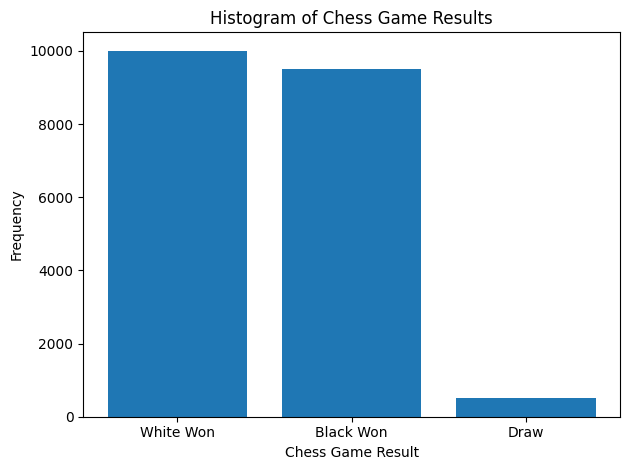

In [10]:
# to view distribution of game categories
category_counts = sampled_df['Result'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Chess Game Result")
plt.ylabel("Frequency")
plt.title("Histogram of Chess Game Results")
plt.tight_layout()
plt.show()

In [11]:
# to view the data types
sampled_df.dtypes

Index                int64
Index.1              int64
Black               object
BlackElo             int64
BlackRatingDiff    float64
Date                object
ECO                 object
Event               object
Opening             object
Result              object
Site                object
Termination         object
TimeControl         object
UTCDate             object
UTCTime             object
White               object
WhiteElo             int64
WhiteRatingDiff    float64
BlackTitle          object
WhiteTitle          object
Move_ply_1          object
Eval_ply_1         float64
Clock_ply_1         object
Category            object
Weekday             object
HigherELO           object
dtype: object

In [12]:
# to convert the dataset into numerical format
sampled_df_numerical = sampled_df.copy()
for column in sampled_df_numerical.columns:
  if sampled_df_numerical[column].dtype == 'object':
    sampled_df_numerical[column] = sampled_df_numerical[column].astype('category')
    sampled_df_numerical[column] = sampled_df_numerical[column].cat.codes

sampled_df_numerical

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,TimeControl,UTCDate,UTCTime,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Move_ply_1,Eval_ply_1,Clock_ply_1,Category,Weekday,HigherELO
119737,119737,9112,6950,1785,-82.0,11,164,895,378,2,8356,0,223,11,2284,14529,1810,9.0,-1,-1,13,0.24,25,2,2,2
72272,72272,21606,2656,1641,9.0,5,102,1039,1289,0,11273,0,180,5,2363,17802,1602,-15.0,-1,-1,13,0.12,20,3,3,0
158154,158154,5070,18389,1786,47.0,17,77,905,1031,0,13769,0,180,17,2594,11515,1598,-5.0,-1,-1,11,0.25,20,3,0,0
65426,65426,7278,983,2416,-6.0,31,78,580,852,2,16899,0,171,31,4366,5670,2556,9.0,-1,-1,11,0.25,7,1,0,2
30074,30074,23046,13203,1646,-10.0,27,215,905,1129,2,4500,0,180,27,15751,12984,1656,27.0,-1,-1,13,0.24,20,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193188,193188,10173,14584,1874,-13.0,21,302,580,439,2,13316,0,174,21,9232,7116,1749,13.0,-1,-1,11,0.25,7,1,5,2
35956,35956,18449,4526,1823,18.0,28,0,622,711,0,5209,2,171,28,14508,10198,2104,-21.0,-1,-1,10,-0.07,7,1,5,0
149399,149399,12912,17315,1532,-12.0,16,77,895,730,2,15087,0,223,16,470,10472,1544,10.0,-1,-1,13,0.24,25,2,4,2
97701,97701,12524,2946,1615,-10.0,8,199,905,318,2,12042,0,180,8,44,3227,1624,10.0,-1,-1,13,0.12,20,3,6,2


In [13]:
# to save the correlation matrix of the numerical dataset into a variable
correlation_matrix = sampled_df_numerical.corr()

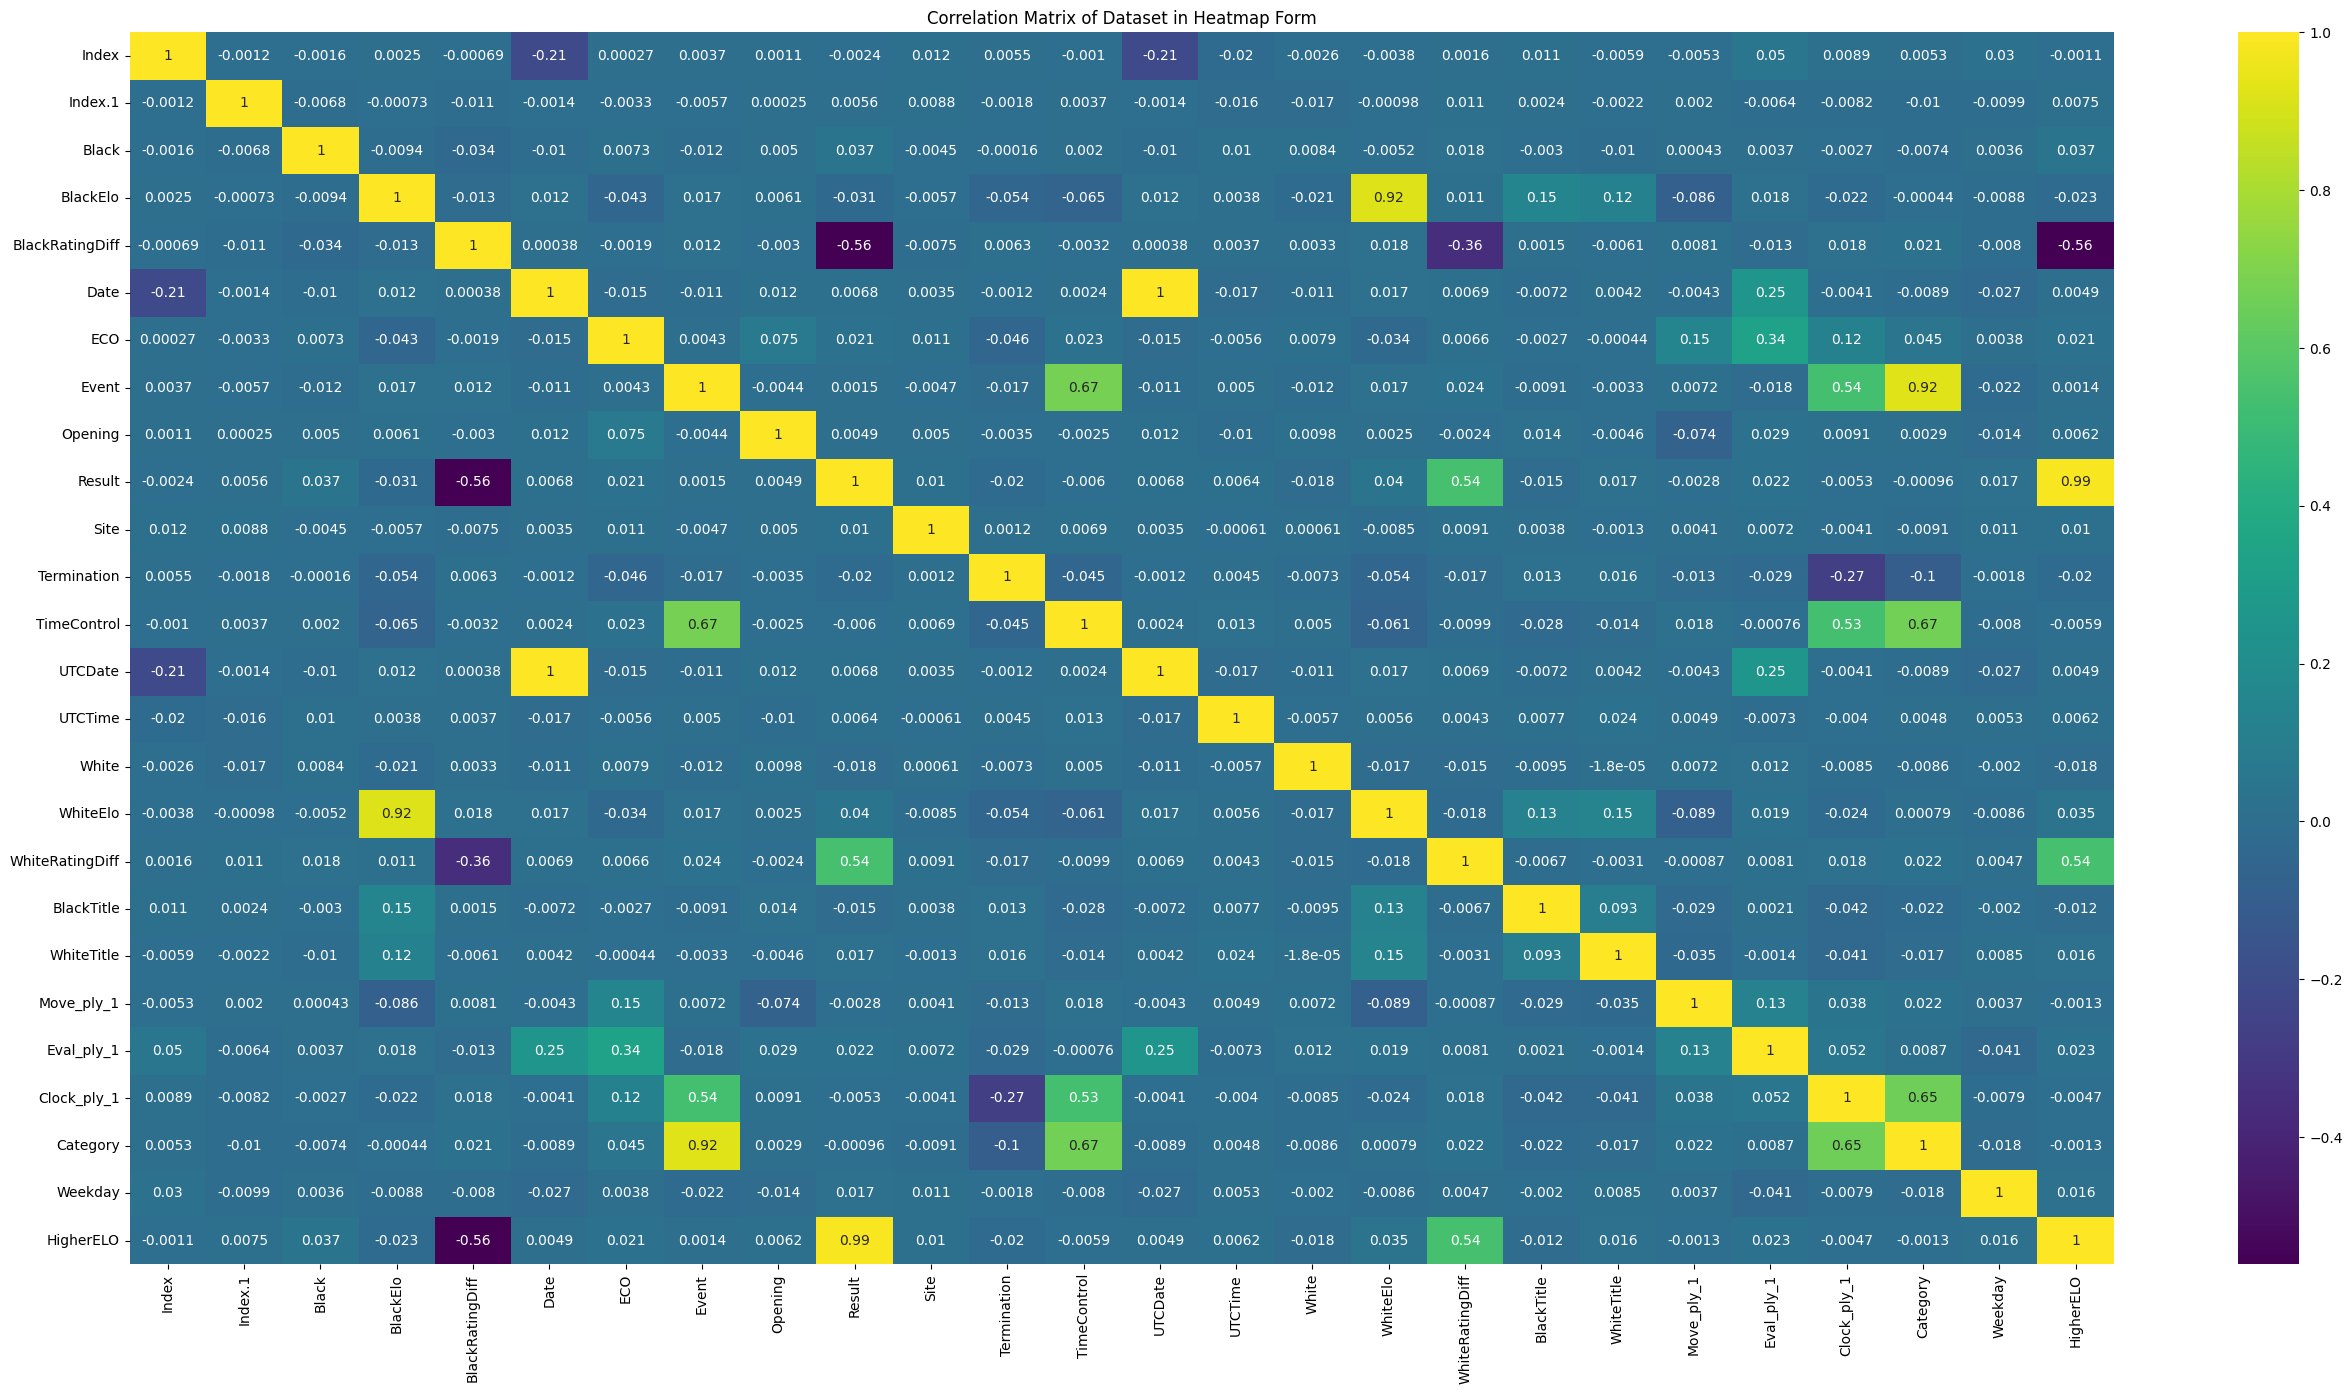

In [14]:
# to view the correlation matrix in a heatmap form
plt.figure(figsize=(32,16))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Dataset in Heatmap Form")
plt.show()

#### **Data Exploration & Transformation (part 2)**

In [16]:
# keeping the columns that are highly correlated with result
columns_to_keep = ['BlackRatingDiff', 'WhiteRatingDiff', 'HigherELO', 'Result']
sampled_df_final = sampled_df[columns_to_keep]

In [17]:
# to view information regarding the sampled dataset
sampled_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 119737 to 51732
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BlackRatingDiff  19935 non-null  float64
 1   WhiteRatingDiff  19935 non-null  float64
 2   HigherELO        20000 non-null  object 
 3   Result           20000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 781.2+ KB


In [18]:
# to get the sum of null values in each column
sampled_df_final.isnull().sum()

BlackRatingDiff    65
WhiteRatingDiff    65
HigherELO           0
Result              0
dtype: int64

In [19]:
# removing columns with null values
sampled_df_final = sampled_df_final.dropna()

In [20]:
# to convert the final dataset into numerical format
final_df_encoded = sampled_df_final.copy()
for column in final_df_encoded.columns:
  if final_df_encoded[column].dtype == 'object':
    final_df_encoded[column] = final_df_encoded[column].astype('category')
    final_df_encoded[column] = final_df_encoded[column].cat.codes

final_df_encoded.head(5)

,BlackRatingDiff,WhiteRatingDiff,HigherELO,Result
119737,-82.0,9.0,2,2
72272,9.0,-15.0,0,0
158154,47.0,-5.0,0,0
65426,-6.0,9.0,2,2
30074,-10.0,27.0,2,2


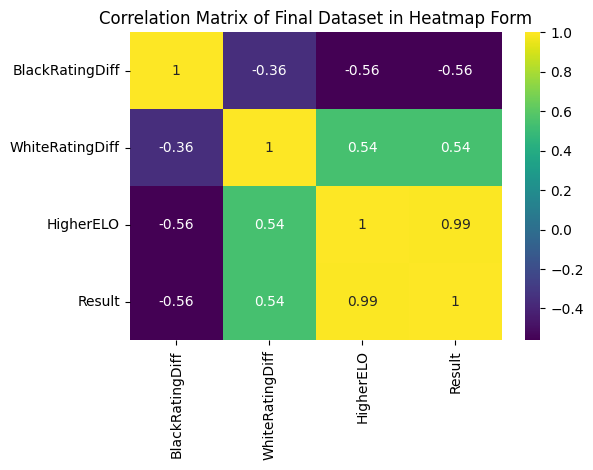

In [21]:
# to save the correlation matrix of the final dataset into a variable
correlation_matrix = final_df_encoded.corr()

# to view the correlation matrix of final dataset in a heatmap form
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Final Dataset in Heatmap Form")
plt.show()

In [22]:
# to view the final dataset
sampled_df_final.head(5)

,BlackRatingDiff,WhiteRatingDiff,HigherELO,Result
119737,-82.0,9.0,White,White Won
72272,9.0,-15.0,Black,Black Won
158154,47.0,-5.0,Black,Black Won
65426,-6.0,9.0,White,White Won
30074,-10.0,27.0,White,White Won


#### **Modelling**

In [24]:
# creating a train-test split for modelling
train = final_df_encoded[["BlackRatingDiff", "WhiteRatingDiff", "HigherELO"]]
target = final_df_encoded[["Result"]]
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, stratify = target, random_state = 42)

In [25]:
# create a decision tree classifier to the build model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 97.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2840
           1       0.58      0.42      0.49       150
           2       0.99      0.99      0.99      2991

    accuracy                           0.98      5981
   macro avg       0.85      0.80      0.82      5981
weighted avg       0.98      0.98      0.98      5981



#### **Assessing**

In [30]:
# gather user input for the features
reult = ""
user_input = {}
user_input['BlackRatingDiff'] = (input("Enter the Black Rating Difference: "))
user_input['WhiteRatingDiff'] = (input("Enter the White Rating Difference " ))
user_input['HigherELO'] = (input("Enter the Color with the Higher ELO (2 - Black, 1- White, 0 - Equal): "))

# prepare user input data
user_input_df = pd.DataFrame([user_input])

# ensure the input features are in the same order as the trained model expects
user_input_df = user_input_df[['BlackRatingDiff', 'WhiteRatingDiff', 'HigherELO']]

# use the trained model to make predictions based on user input
prediction = tree.predict(user_input_df)

if prediction == [2]:
  result = "\nWhite Wins!"
elif prediction == [1]:
  result = "\nBlack Wins!"
else:
  result = "\nDraw!"

print(result)

Enter the Black Rating Difference: 6
Enter the White Rating Difference 6
Enter the Color with the Higher ELO (2 - Black, 1- White, 0 - Draw): 0

Draw!
